In [5]:
import sys
import numpy as np
import os
sys.path.append(os.path.expanduser("~/git/machine_learning/src"))
import importlib
import models
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf

In [6]:
data_dir = os.path.expanduser("~m2d/git/analysis_playground/ml/data/training_data")

pars = np.load(os.path.join(data_dir, "orhs2-pars_pars.npy"))
refl = np.load(os.path.join(data_dir, "orhs2-pars_data.npy"))
q_values = np.load(os.path.join(data_dir, "orhs_q_values.npy"))

print(pars.shape)
print(refl.shape)
print(q_values.shape)

idx = 0
nset=10000

(100000, 7)
(100000, 100)
(100,)


In [7]:


testset= np.asarray(refl[-nset:])
testsetout= np.asarray(pars[-nset:])
testpars = np.asarray (pars[-nset:])


In [8]:
import importlib
importlib.reload(models)
n_data = refl.shape[0]
n_features = refl.shape[1]
n_outputs = 7

encoder=models.cnn_encoder(n_data, n_features, n_outputs)
encoder.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam())
history = encoder.fit(refl, pars,
                        epochs=20, batch_size=2056,
                        validation_data=(testset, testsetout))

Epoch 1/20


2023-06-19 11:23:20.169951: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


49/49 [==============================] - 9s 162ms/step - loss: 0.2956 - val_loss: 0.2507
Epoch 2/20
49/49 [==============================] - 7s 142ms/step - loss: 0.2374 - val_loss: 0.2233
Epoch 3/20
49/49 [==============================] - 7s 144ms/step - loss: 0.2209 - val_loss: 0.2136
Epoch 4/20
49/49 [==============================] - 7s 139ms/step - loss: 0.2132 - val_loss: 0.2067
Epoch 5/20
49/49 [==============================] - 7s 140ms/step - loss: 0.2048 - val_loss: 0.1995
Epoch 6/20
49/49 [==============================] - 8s 164ms/step - loss: 0.1987 - val_loss: 0.1933
Epoch 7/20
49/49 [==============================] - 7s 149ms/step - loss: 0.1935 - val_loss: 0.1886
Epoch 8/20
49/49 [==============================] - 7s 148ms/step - loss: 0.1874 - val_loss: 0.1810
Epoch 9/20
49/49 [==============================] - 8s 154ms/step - loss: 0.1827 - val_loss: 0.1796
Epoch 10/20
49/49 [==============================] - 7s 148ms/step - loss: 0.1781 - val_loss: 0.1757
Epoch 11/2

In [9]:
importlib.reload(models)
data_dir = os.path.expanduser("~/git/machine_learning/data")
models.save_model(encoder, "twolayerpars", data_dir)

In [55]:
importlib.reload(models)

<module 'models' from '/SNS/users/vogtdan000/git/machine_learning/src/models.py'>

In [1]:
model=models.load_model("layeronecnn", data_dir)
idx=0

NameError: name 'models' is not defined

In [10]:
pars=encoder.predict(testset)


313/313 [==============================] - 10s 31ms/step


In [11]:
idx=0

In [12]:
print (pars[idx])
print(testsetout[idx])
idx+=1

[ 0.15863281 -0.10618944  0.08716353  0.28144723 -0.5968087   0.09214333
  0.7440859 ]
[-0.5306515  -0.23764937 -0.80548256  0.44223432 -0.41918583  0.72816396
  0.5038983 ]


(10000, 7)


Text(0.5, 0, 'a for index 1')

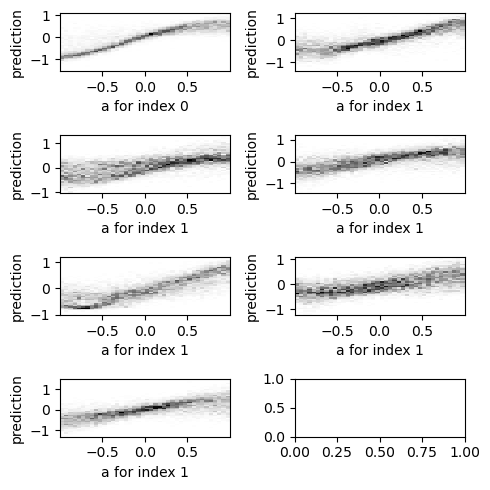

In [18]:
n_bins=40
print(pars.shape)
fig, axs= plt.subplots(4,2, sharey=False, tight_layout= True, dpi=100, figsize= (5,5))

ax=plt.subplot(4, 2, 1)
ax.hist2d(testsetout[:,0], pars[:,0], bins=n_bins, cmap= "Greys")
plt.ylabel('prediction')
plt.xlabel('a for index 0')

ax=plt.subplot(4, 2, 2)
ax.hist2d(testsetout[:,1], pars[:,1], bins=n_bins, cmap= "Greys")
plt.ylabel('prediction')
plt.xlabel('a for index 1')

ax=plt.subplot(4, 2, 3)
ax.hist2d(testsetout[:,2], pars[:,2], bins=n_bins, cmap= "Greys")
plt.ylabel('prediction')
plt.xlabel('a for index 1')


ax=plt.subplot(4, 2, 4)
ax.hist2d(testsetout[:,3], pars[:,3], bins=n_bins, cmap= "Greys")
plt.ylabel('prediction')
plt.xlabel('a for index 1')


ax=plt.subplot(4, 2, 5)
ax.hist2d(testsetout[:,4], pars[:,4], bins=n_bins, cmap= "Greys")
plt.ylabel('prediction')
plt.xlabel('a for index 1')


ax=plt.subplot(4, 2, 6)
ax.hist2d(testsetout[:,5], pars[:,5], bins=n_bins, cmap= "Greys")
plt.ylabel('prediction')
plt.xlabel('a for index 1')


ax=plt.subplot(4, 2, 7)
ax.hist2d(testsetout[:,6], pars[:,6], bins=n_bins, cmap= "Greys")
plt.ylabel('prediction')
plt.xlabel('a for index 1')

